# Importing libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set(color_codes = True)
sns.set_palette(palette = "magma",n_colors = 8)

# Importing dataset

In [95]:
data = pd.read_csv('music mental health.csv')
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


# checking dataset

In [96]:
data.shape

(736, 33)

In [97]:
#checking datatypes
data.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

This dataset has 33 columns, 26 columns are object type and  the rest are numeric type

In [99]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


Range of music listeners are from 10-89.


In [100]:
data.describe(exclude="number").T

,count,unique,top,freq
Timestamp,736,735,8/28/2022 16:15:08,2
Primary streaming service,735,6,Spotify,458
While working,733,2,Yes,579
Instrumentalist,732,2,No,497
Composer,735,2,No,609
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,732,2,Yes,404
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343


The Timestamp column has a lot of unique value whereas Permission column has only one unique value.

# Removing outliers

In [101]:
age_index = data[(data["Age"]>70)].index
data = data.drop(age_index, axis = 0)


In [102]:
hpd_index = data[data["Hours per day"]>=15].index
data=data.drop(hpd_index,axis=0)

In [103]:
data_index = data[data["BPM"]>200].index
data= data.drop(data_index, axis=0)

## Removing not needed columns

In [104]:
data.drop(["Timestamp", "Permissions"], axis=1,inplace=True)

## checking correlation

In [105]:
#checking correlation with only a specified column of interest
corr_data = data.corr()["Age"]
corr_data

Age              1.000000
Hours per day   -0.098354
BPM             -0.019868
Anxiety         -0.147222
Depression      -0.087602
Insomnia         0.039365
OCD             -0.123097
Name: Age, dtype: float64

<AxesSubplot:>

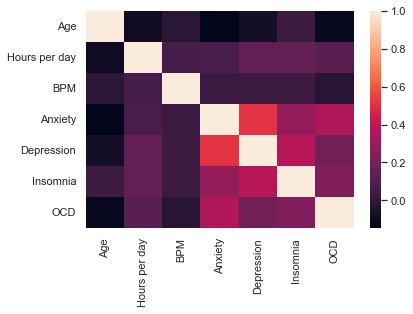

In [106]:
sns.heatmap(data.corr())

Removing missing values

In [107]:
data.isnull().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             105
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [108]:
#filling the null values in the above empty columns
data['Age'] = data['Age'].fillna(round(data['Age'].mean(), 0))
data['Primary streaming service'] = data['Primary streaming service'].fillna(data['Primary streaming service'].mode()[0])
data['While working'] = data['While working'].fillna(data['While working'].mode()[0])
data['Instrumentalist'] = data['Instrumentalist'].fillna(data['Instrumentalist'].mode()[0])
data['Composer'] = data['Composer'].fillna(data['Composer'].mode()[0])
data['Foreign languages'] = data['Foreign languages'].fillna(data['Foreign languages'].mode()[0])
data['Music effects'] = data['Music effects'].fillna(data['Music effects'].mode()[0])

In [109]:
data.isnull().sum()

Age                               0
Primary streaming service         0
Hours per day                     0
While working                     0
Instrumentalist                   0
Composer                          0
Fav genre                         0
Exploratory                       0
Foreign languages                 0
BPM                             105
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [110]:
data["BPM"].isnull().sum()


105

In [111]:
miss_bpm = data[data['BPM'].isnull() == True]
miss_bpm

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
10,18.0,Spotify,3.0,Yes,Yes,No,Country,Yes,No,NaN,...,Rarely,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect
12,25.0,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,NaN,...,Sometimes,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve
15,17.0,Spotify,2.0,No,No,No,Pop,Yes,Yes,NaN,...,Very frequently,Rarely,Sometimes,Sometimes,Rarely,7.0,5.0,4.0,1.0,Worsen
30,20.0,Apple Music,5.0,Yes,Yes,No,Rock,Yes,Yes,NaN,...,Sometimes,Sometimes,Sometimes,Very frequently,Rarely,7.0,7.0,2.0,0.0,Improve
32,19.0,Spotify,6.0,Yes,Yes,No,Metal,Yes,Yes,NaN,...,Sometimes,Never,Never,Sometimes,Sometimes,9.0,8.0,2.0,3.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,18.0,Spotify,4.0,Yes,No,No,R&B,No,No,NaN,...,Sometimes,Very frequently,Sometimes,Never,Never,8.0,0.0,0.0,2.0,No effect
700,20.0,YouTube Music,1.0,Yes,No,No,Pop,No,Yes,NaN,...,Very frequently,Rarely,Sometimes,Rarely,Very frequently,8.0,9.0,6.0,5.0,Worsen
706,23.0,Spotify,1.0,Yes,Yes,No,Rock,Yes,Yes,NaN,...,Very frequently,Sometimes,Sometimes,Very frequently,Very frequently,8.0,6.0,1.0,4.0,Improve
712,23.0,I do not use a streaming service.,3.0,Yes,No,No,Rock,No,No,NaN,...,Sometimes,Rarely,Never,Very frequently,Never,10.0,5.0,2.0,0.0,Improve


In [112]:
miss_bpm["Fav genre"].unique()

array(['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical',
       'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel',
       'K pop', 'Rap'], dtype=object)

In [113]:
miss_bpm_genre = ['Country', 'Hip hop', 'Pop', 'Rock', 'Metal', 'Classical',
       'Video game music', 'R&B', 'Folk', 'Jazz', 'EDM', 'Gospel',
       'K pop', 'Rap']

In [114]:
for i in miss_bpm_genre:
    data["BPM"] = data["BPM"].fillna(round(data[data["Fav genre"]==i]["BPM"].mean(),0))

## checking dataset and creating copy

In [115]:
data.shape

(714, 31)

In [116]:
df=data.copy()

## data Visualization

<AxesSubplot:xlabel='Age', ylabel='Count'>

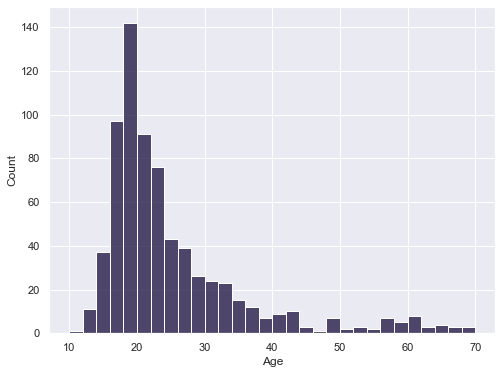

In [117]:
plt.figure(figsize=(8,6))
sns.histplot(data["Age"])

People of age 16-24 listen frequently to music

<Figure size 576x432 with 0 Axes>

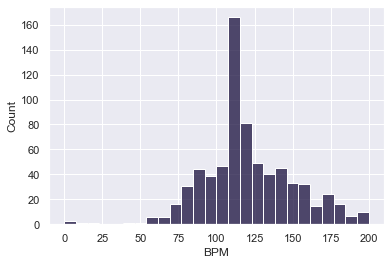

<Figure size 576x432 with 0 Axes>

In [118]:
sns.histplot(data["BPM"])
plt.figure(figsize = (8,6))

Most songs are heard between range of 100-125 BPM

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spotify'),
  Text(1, 0, 'Pandora'),
  Text(2, 0, 'YouTube Music'),
  Text(3, 0, 'I do not use a streaming service.'),
  Text(4, 0, 'Apple Music'),
  Text(5, 0, 'Other streaming service')])

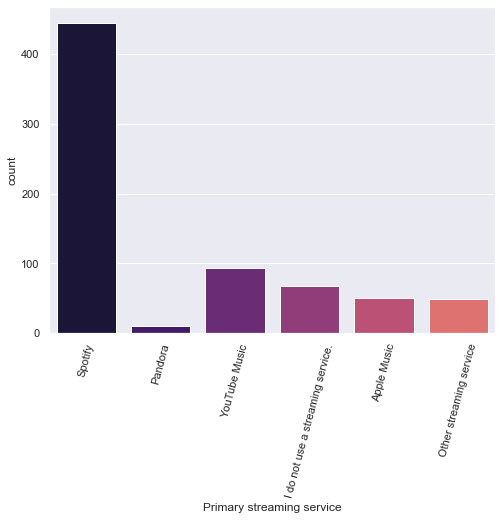

In [122]:
plt.figure(figsize=(8,6))
sns.countplot(data["Primary streaming service"])
plt.xticks(rotation=75)

Spotify is the most used streaming service

<AxesSubplot:xlabel='While working', ylabel='count'>

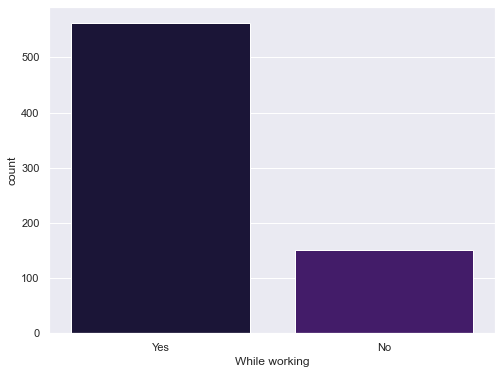

In [129]:
plt.figure(figsize=(8,6))
sns.countplot(data["While working"])

Around 80 %people like to hear music while working

Text(0.5, 0, 'Classical Music')

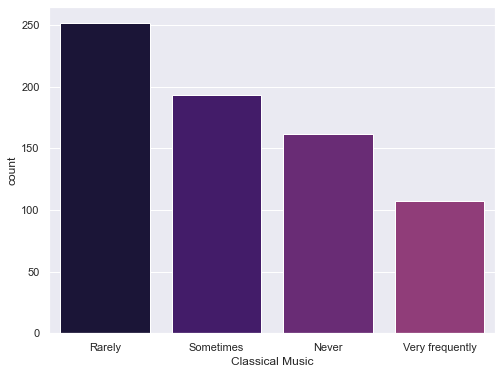

In [132]:
plt.figure(figsize=(8,6))
sns.countplot(data["Frequency [Classical]"])
plt.xlabel("Classical Music")

35% people very rarely listen Classical music.

22% people never listen classical music whereas 15% listen very frequently.



Text(0.5, 0, 'Country music')

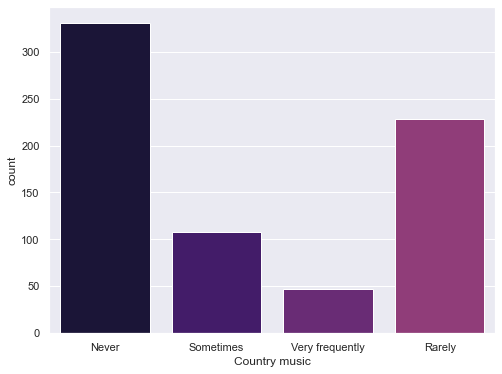

In [137]:
plt.figure(figsize=(8,6))
sns.countplot(data["Frequency [Country]"])
plt.xlabel("Country music")

About 80 %people,never listen to country music at all, 7% frequently listen and 36 % listen rarely

Text(0.5, 0, 'EDM Music')

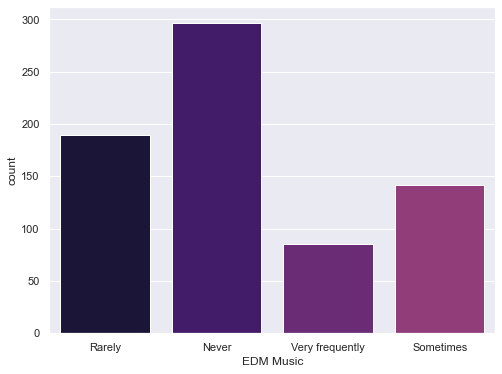

In [145]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [EDM]'])
plt.xlabel('EDM Music')

Text(0.5, 0, 'Folk Music')

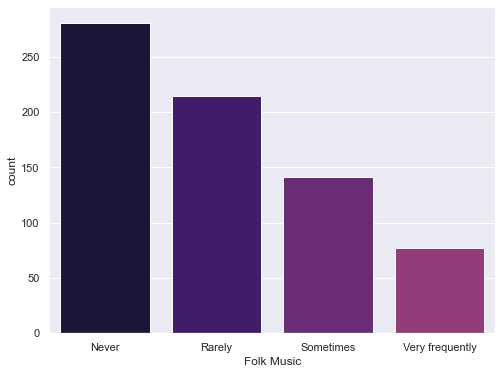

In [146]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Folk]'])
plt.xlabel('Folk Music')

39% people never listen folk music and 10% are very frequently hear this music.



Text(0.5, 0, 'Gospel Music')

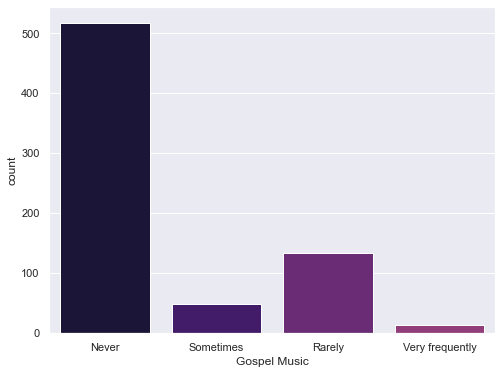

In [147]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Gospel]'])
plt.xlabel('Gospel Music')

Gospel music is very unpopular between listeners almost 75% people not hear it.

Text(0.5, 0, 'Hip Hop Music')

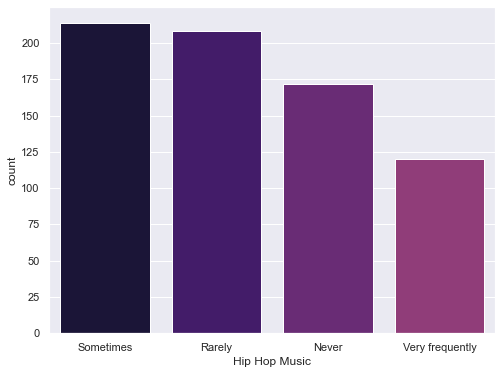

In [149]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Hip hop]'])
plt.xlabel('Hip Hop Music')

Hip hop is quite heared music type. Although 23% people don't listen this but other than that eveyone hear it.

Text(0.5, 0, 'Jazz Music')

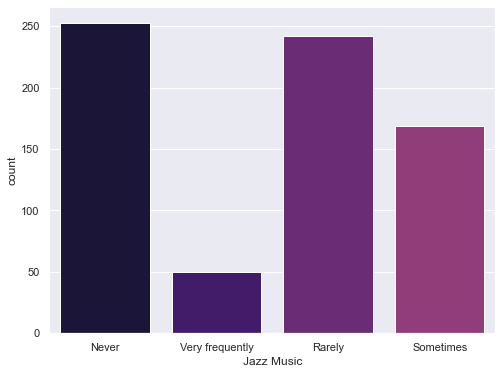

In [150]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Jazz]'])
plt.xlabel('Jazz Music')

Jazz music is also very unheard music genres nowadays. Because 35% never hear this and 33% hear it rarely.

Text(0.5, 0, 'K Pop Music')

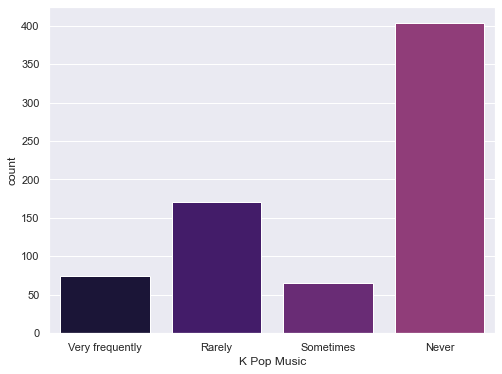

In [151]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [K pop]'])
plt.xlabel('K Pop Music')


This is also one of less heard music. 56% never hear this music.

Text(0.5, 0, 'Latin Music')

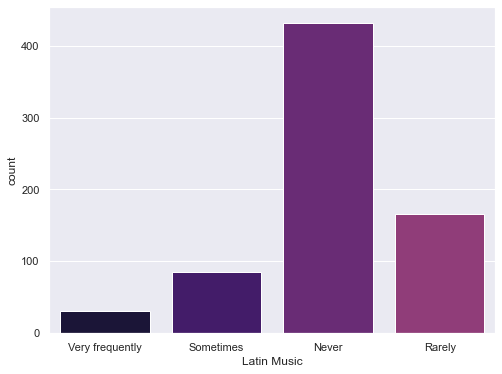

In [152]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Latin]'])
plt.xlabel('Latin Music')

Text(0.5, 0, 'Rap Music')

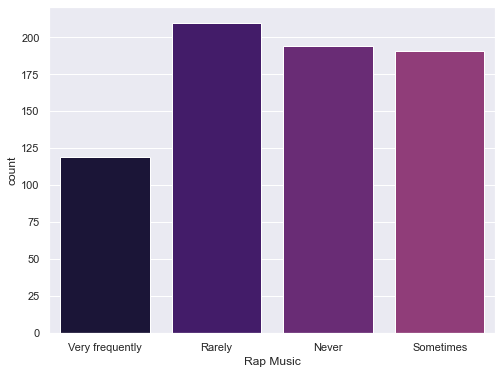

In [153]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['Frequency [Rap]'])
plt.xlabel('Rap Music')

26% people never hear it while 30% hear it rarely

## Bivariate Analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

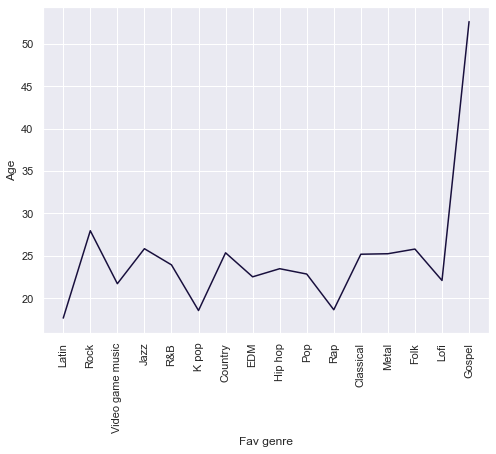

In [155]:
#lineplot
plt.figure(figsize=(8,6))
sns.lineplot(x=data['Fav genre'], y=data['Age'], ci=None)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

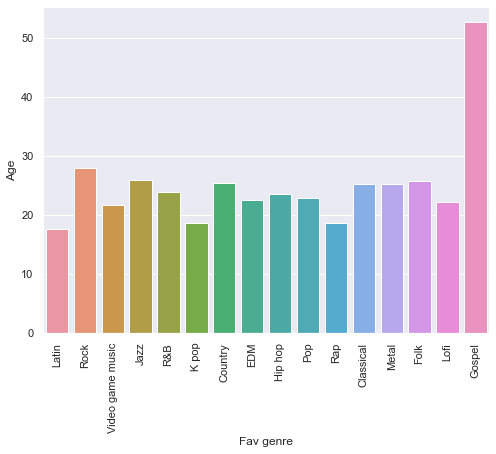

In [156]:
#Barplot
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Age'], ci=None)
plt.xticks(rotation=90)

People around age of 20 are interested in Latin, K pop and Rap songs whereas Gospel is more famous in people around age of 50 and above.

Besides these above mentioned genre are heard by people from age of 20 to 30.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

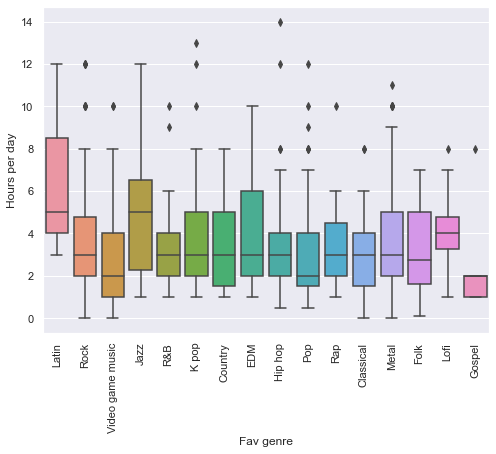

In [157]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data["Fav genre"],y=data["Hours per day"])
plt.xticks(rotation=90)

People work 12 hours a day use to listen Latin and Jazz genre music more.

People listening music of Gospel genre work less than others.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

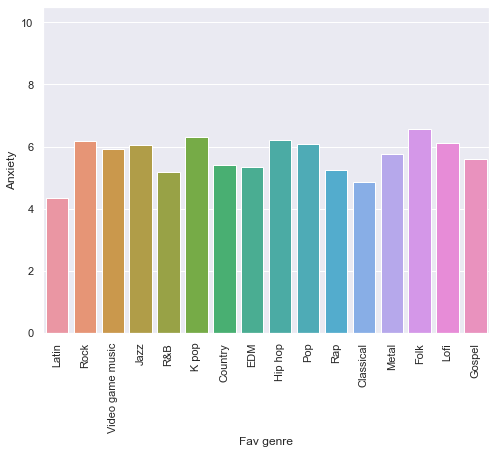

In [163]:
plt.figure(figsize=(8,6))
sns.barplot(x=data["Fav genre"], y =data["Anxiety"],errwidth=0)
plt.xticks(rotation=90)

Every listener has Anxiety level above 4 but Rock, Jazz, K pop, Hip hop, Pop, and Folk music listeners have anxiety levey above 6.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

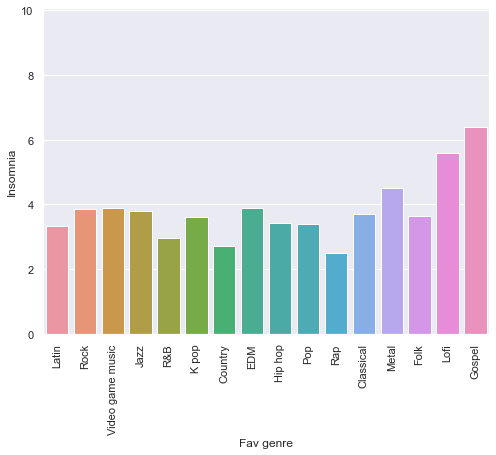

In [164]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Insomnia'], errwidth=0)
plt.xticks(rotation=90)

Every listener have insomnia level below 4 besides Metal, Lofi, and Gospel.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

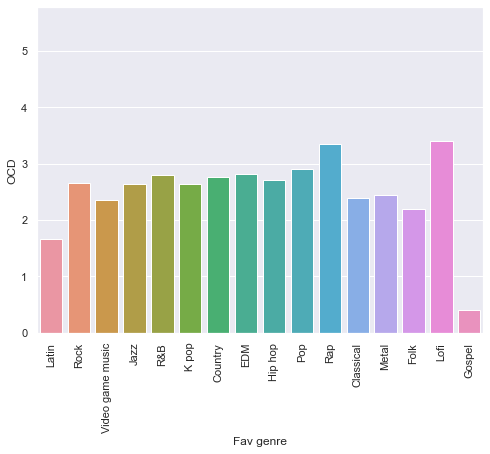

In [166]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['OCD'], errwidth=0)
plt.xticks(rotation=90)

The maximum OCD leve is above 3 in Rap and Lofi listeners.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

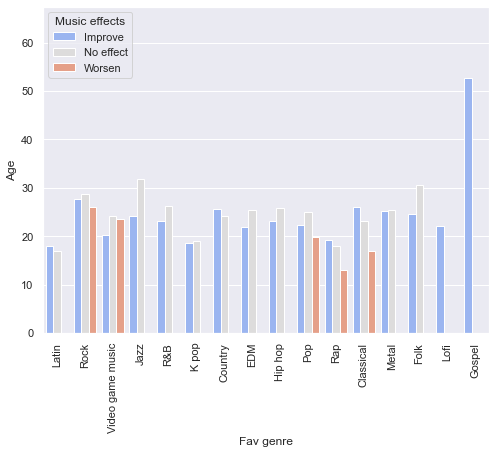

In [167]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Age'], hue=data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

Every Music listeners of every age showing some kind of improvement but Rock, Video Game Music, Pop, Rap, and Classical have worsen condition.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

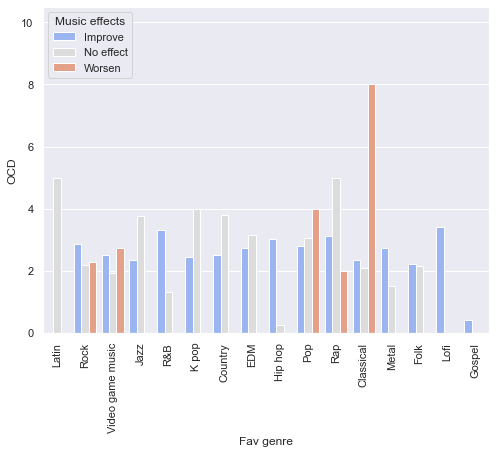

In [168]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['OCD'], hue=data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)


Rock, Video Game Music, Pop, Rap, and Classical listeners have some level of OCD but Classical listeners have highest OCD.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

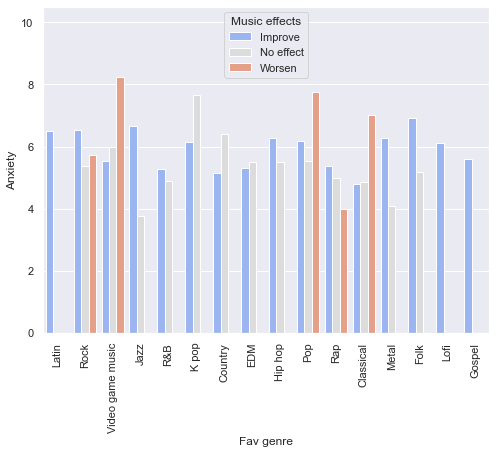

In [171]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Anxiety'], hue=data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

Rock, Video Game Music, Pop, Rap, and Classical listeners have some level of Anxiety but Video Game Music listeners have highest Anxiety.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

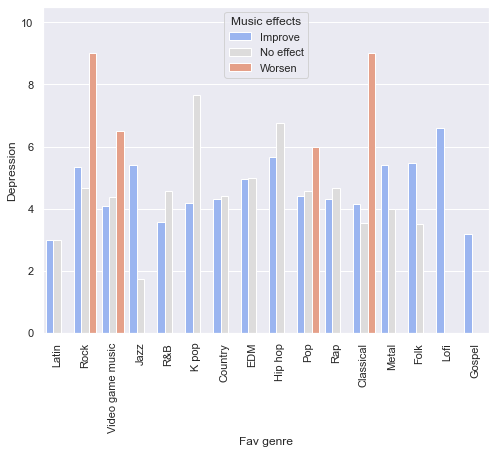

In [172]:
plt.figure(figsize=(8,6))
sns.barplot(x=data['Fav genre'], y=data['Depression'], hue=data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

Rock, Video Game Music, Pop, and Classical listeners have high level of Depression.